In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
import datetime as dt


In [6]:
engine = create_engine("sqlite:///C:/Users/rohit/LearnPython/MySQL/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

DatabaseError: (sqlite3.DatabaseError) file is not a database [SQL: "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name"] (Background on this error at: http://sqlalche.me/e/4xp6)

In [5]:
 # We can view all of the classes that automap found
Base.classes.keys()

[]

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [110]:
engine.execute("select * from Measurement order by date desc Limit 10 ").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [12]:
inspector = inspect(engine)
inspector.get_columns('Station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [13]:
inspector.get_columns('Measurement')


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [87]:
from sqlalchemy import and_
query_end_date = dt.date(2017,8,23)
query_start_date = query_end_date  - dt.timedelta(days=365)
prcp_data = session.query(Measurement.date, Measurement.prcp).\
      filter(and_(Measurement.date > query_start_date, Measurement.date < query_end_date)).all()
   

In [99]:
df = pd.DataFrame(prcp_data, columns=['date','prcp'])
#df1=df
df.set_index('date',inplace=True)
summary_df=df.sort_values(by=["date"],ascending=False)

In [97]:
summary_df.head()

,prcp
date,
2017-08-22,0.50
2017-08-22,0.00
2017-08-22,0.00
2017-08-21,0.56
2017-08-21,NaN


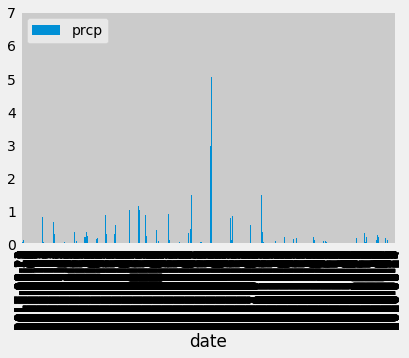

In [98]:
summary_df.plot(kind="bar",label=True,grid=True)

#Saving the Graph image
plt.savefig("bar_graph.png")
plt.show()
plt.tight_layout()

In [105]:
#Summary of the data 
summary_df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [109]:
#query to calculate the total number of stations.
station_count = session.query(Measurement.station).count()
print(f"Station count : {station_count}")

Station count : 19550


In [117]:
#ordered data of Station & Observations
ordered_count = session.query(Measurement.station,Measurement.tobs).order_by(Measurement.station,Measurement.tobs).all()
for record in ordered_count :
    print(f"Station: {record[0]} , Observations: {record[1]}")
    

Station: USC00511918 , Observations: 53.0
Station: USC00511918 , Observations: 55.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observation

Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observations: 75.0
Station: USC00511918 , Observation

Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observations: 69.0
Station: USC00513117 , Observation

Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observations: 73.0
Station: USC00513117 , Observation

Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observations: 77.0
Station: USC00513117 , Observation

Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observations: 73.0
Station: USC00514830 , Observation

Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observations: 78.0
Station: USC00514830 , Observation

Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observations: 68.0
Station: USC00516128 , Observation

Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observations: 72.0
Station: USC00516128 , Observation

Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 77.0
Station: USC00516128 , Observations: 78.0
Station: USC00516128 , Observations: 78.0
Station: USC00516128 , Observations: 78.0
Station: USC00516128 , Observations: 78.0
Station: USC00516128 , Observation

Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observations: 77.0
Station: USC00517948 , Observation

Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 60.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observations: 61.0
Station: USC00519281 , Observation

Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observations: 71.0
Station: USC00519281 , Observation

Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observations: 74.0
Station: USC00519281 , Observation

Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 72.0
Station: USC00519397 , Observations: 73.0
Station: USC00519397 , Observations: 73.0
Station: USC00519397 , Observations: 73.0
Station: USC00519397 , Observation

Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observations: 77.0
Station: USC00519397 , Observation

Station: USC00519523 , Observations: 62.0
Station: USC00519523 , Observations: 62.0
Station: USC00519523 , Observations: 62.0
Station: USC00519523 , Observations: 62.0
Station: USC00519523 , Observations: 62.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observations: 63.0
Station: USC00519523 , Observation

Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observations: 74.0
Station: USC00519523 , Observation

Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observations: 78.0
Station: USC00519523 , Observation

In [133]:
#Station with highest count of Observations

max_observation_fun = session.query(Measurement.station,func.max(Measurement.tobs)).all()
print(f"Station with max observations is : {max_observation_fun[0][0]} and Observation count: {max_observation_fun[0][1]}")

#max_observation = session.query(Measurement.station,Measurement.tobs).order_by(Measurement.tobs).first()
#print(f"Station with max observations is : {max_observation[0]} and Observation count: {max_observation[1]}")

Station with max observations is : USC00519397 and Observation count: 87.0


In [136]:
query_end_date1 = dt.date(2017,8,23)
query_start_date1 = query_end_date1  - dt.timedelta(weeks=48)

prcp_data = session.query(Measurement.station,Measurement.tobs).\
      filter(and_(Measurement.date > query_start_date1, Measurement.date < query_end_date1)).\
      group_by(Measurement.station).\
      order_by(Measurement.tobs.desc()).all()

In [137]:
prcp_data

[('USC00519523', 79.0),
 ('USC00514830', 78.0),
 ('USC00513117', 77.0),
 ('USC00519281', 77.0),
 ('USC00517948', 76.0),
 ('USC00519397', 76.0),
 ('USC00516128', 73.0)]

In [24]:
my_list = [('a', 1), ('b', 2)]
x=dict(my_list)
x['b']

2

In [79]:
a = {}
a["abc"] = 1
a["abc"] = 2

key = "somekey"
a.setdefault(key, [])
a[key].append(21)
a[key].append(41)
a['somekey']

[21, 41]